In [2]:
import pandas as pd
import anndata as ad
import tarfile
import scanpy as sc
from scipy.io import mmread
import numpy as np
from scipy.stats import median_abs_deviation
import matplotlib.pyplot as plt

### Read the files (skip after first time)

In [4]:
file_path1 = "C:/Users/gajaj/Downloads/GSM7710073_C3L-00004-T1_CPT0001540013_snRNA_ccRCC.tar.gz"
file_path2 = "C:/Users/gajaj/Downloads/GSM7710088_C3N-00495-T1_CPT0078510004_snRNA_ccRCC.tar.gz"
output_dir1 = 'C:/Users/gajaj/OneDrive/Documents/TUM/computational_single_cell/preprocessing_project/Sample1'
output_dir2 = "C:/Users/gajaj/OneDrive/Documents/TUM/computational_single_cell/preprocessing_project/Sample2"

In [6]:
with tarfile.open(file_path1, "r") as tar:
    tar.extractall(path=output_dir1)
    print("Files extracted successfully")

Files extracted successfully


In [7]:
with tarfile.open(file_path2, "r") as tar:
    tar.extractall(path=output_dir2)
    print("Files extracted successfully")

Files extracted successfully


In [14]:
input_file_barcodes1 = "Sample1/C3L-00004-T1_CPT0001540013_snRNA_ccRCC/outs/raw_feature_bc_matrix/barcodes.tsv.gz"
input_file_features1 = "Sample1/C3L-00004-T1_CPT0001540013_snRNA_ccRCC/outs/raw_feature_bc_matrix/features.tsv.gz"
input_file_matrix1 = "Sample1/C3L-00004-T1_CPT0001540013_snRNA_ccRCC/outs/raw_feature_bc_matrix/matrix.mtx.gz"

input_file_barcodes2 = "Sample2/C3N-00495-T1_CPT0078510004_snRNA_ccRCC/outs/raw_feature_bc_matrix/barcodes.tsv.gz"
input_file_features2 = "Sample2/C3N-00495-T1_CPT0078510004_snRNA_ccRCC/outs/raw_feature_bc_matrix/features.tsv.gz"
input_file_matrix2 = "Sample2/C3N-00495-T1_CPT0078510004_snRNA_ccRCC/outs/raw_feature_bc_matrix/matrix.mtx.gz"

In [15]:
output_file_barcodes1 = "Sample1/C3L-00004-T1_CPT0001540013_snRNA_ccRCC/outs/raw_feature_bc_matrix/barcodes.tsv"
output_file_features1 = "Sample1/C3L-00004-T1_CPT0001540013_snRNA_ccRCC/outs/raw_feature_bc_matrix/features.tsv"
output_file_matrix1 = "Sample1/C3L-00004-T1_CPT0001540013_snRNA_ccRCC/outs/raw_feature_bc_matrix/matrix.mtx"

output_file_barcodes2 = "Sample2/C3N-00495-T1_CPT0078510004_snRNA_ccRCC/outs/raw_feature_bc_matrix/barcodes.tsv"
output_file_features2 = "Sample2/C3N-00495-T1_CPT0078510004_snRNA_ccRCC/outs/raw_feature_bc_matrix/features.tsv"
output_file_matrix2 = "Sample2/C3N-00495-T1_CPT0078510004_snRNA_ccRCC/outs/raw_feature_bc_matrix/matrix.mtx"

In [10]:
import gzip

with gzip.open(input_file_barcodes1, "rt") as gz_file:  
    with open(output_file_barcodes1, "w") as out_file:
        out_file.write(gz_file.read())

In [11]:
with gzip.open(input_file_features1, "rt") as gz_file:  
    with open(output_file_features1, "w") as out_file:
        out_file.write(gz_file.read())

In [16]:
with gzip.open(input_file_matrix1, "rt") as gz_file:  
    with open(output_file_matrix1, "w") as out_file:
        out_file.write(gz_file.read())

In [17]:
with gzip.open(input_file_barcodes2, "rt") as gz_file:  
    with open(output_file_barcodes2, "w") as out_file:
        out_file.write(gz_file.read())

In [18]:
with gzip.open(input_file_features2, "rt") as gz_file:  
    with open(output_file_features2, "w") as out_file:
        out_file.write(gz_file.read())

In [19]:
with gzip.open(input_file_matrix2, "rt") as gz_file:  
    with open(output_file_matrix2, "w") as out_file:
        out_file.write(gz_file.read())

### Create an Anndata object for Sample 1

In [3]:
output_file_barcodes1 = "Sample1/C3L-00004-T1_CPT0001540013_snRNA_ccRCC/outs/raw_feature_bc_matrix/barcodes.tsv"
output_file_features1 = "Sample1/C3L-00004-T1_CPT0001540013_snRNA_ccRCC/outs/raw_feature_bc_matrix/features.tsv"
output_file_matrix1 = "Sample1/C3L-00004-T1_CPT0001540013_snRNA_ccRCC/outs/raw_feature_bc_matrix/matrix.mtx"

output_file_barcodes2 = "Sample2/C3N-00495-T1_CPT0078510004_snRNA_ccRCC/outs/raw_feature_bc_matrix/barcodes.tsv"
output_file_features2 = "Sample2/C3N-00495-T1_CPT0078510004_snRNA_ccRCC/outs/raw_feature_bc_matrix/features.tsv"
output_file_matrix2 = 'Sample2/C3N-00495-T1_CPT0078510004_snRNA_ccRCC/outs/raw_feature_bc_matrix/matrix.mtx'

In [4]:
barcodes1 = pd.read_csv(output_file_barcodes1, sep='\t', index_col=None, header=None)[0].values
barcodes1

array(['AAACCCAAGAAACCAT-1', 'AAACCCAAGAAACCCA-1', 'AAACCCAAGAAACGAA-1',
       ..., 'TTTGTTGTCTTTGCGC-1', 'TTTGTTGTCTTTGCTA-1',
       'TTTGTTGTCTTTGGCT-1'], dtype=object)

In [5]:
features1 = pd.read_csv(output_file_features1, sep='\t', index_col=None, header=None)[1].values
features1

array(['MIR1302-2HG', 'FAM138A', 'OR4F5', ..., 'AC007325.1', 'AC007325.4',
       'AC007325.2'], dtype=object)

In [6]:
gene_ids1 = pd.read_csv(output_file_features1, sep='\t', index_col=None, header=None)[0].values
gene_ids1

array(['ENSG00000243485', 'ENSG00000237613', 'ENSG00000186092', ...,
       'ENSG00000276017', 'ENSG00000278817', 'ENSG00000277196'],
      dtype=object)

In [7]:
X1 = mmread(output_file_matrix1).tocsc()  # Convert to compressed sparse column format

In [8]:
adata1 = sc.AnnData(X1.T)  # Transpose matrix (cells x genes)
adata1.obs_names = barcodes1  # Assign cell barcodes as obs_names
adata1.var_names = features1  # Assign gene names as var_names

adata1.var["gene_ids"] = gene_ids1

In [9]:
print(adata1)

AnnData object with n_obs × n_vars = 1127217 × 36601
    var: 'gene_ids'


### Create an Anndata object for Sample 2

In [9]:
barcodes2 = pd.read_csv(output_file_barcodes2, sep='\t', index_col=None, header=None)[0].values
barcodes2

array(['AAACCCAAGAAACACT-1', 'AAACCCAAGAAACTAC-1', 'AAACCCAAGAAAGACA-1',
       ..., 'TTTGTTGTCTTTACAC-1', 'TTTGTTGTCTTTGCGC-1',
       'TTTGTTGTCTTTGCTA-1'], dtype=object)

In [10]:
features2 = pd.read_csv(output_file_features2, sep='\t', index_col=None, header=None)[1].values
features2

array(['MIR1302-2HG', 'FAM138A', 'OR4F5', ..., 'AC007325.1', 'AC007325.4',
       'AC007325.2'], dtype=object)

In [11]:
gene_ids2 = pd.read_csv(output_file_features2, sep='\t', index_col=None, header=None)[0].values
gene_ids2

array(['ENSG00000243485', 'ENSG00000237613', 'ENSG00000186092', ...,
       'ENSG00000276017', 'ENSG00000278817', 'ENSG00000277196'],
      dtype=object)

In [12]:
X2 = mmread(output_file_matrix2).tocsc()  # Convert to compressed sparse column format

In [13]:
adata2 = sc.AnnData(X2.T)  # Transpose matrix (cells x genes)
adata2.obs_names = barcodes2  # Assign cell barcodes as obs_names
adata2.var_names = features2  # Assign gene names as var_names

adata2.var["gene_ids"] = gene_ids2

In [14]:
print(adata2)

AnnData object with n_obs × n_vars = 940788 × 36601
    var: 'gene_ids'


In [15]:
adata2.var

,gene_ids
MIR1302-2HG,ENSG00000243485
FAM138A,ENSG00000237613
OR4F5,ENSG00000186092
AL627309.1,ENSG00000238009
AL627309.3,ENSG00000239945
...,...
AC141272.1,ENSG00000277836
AC023491.2,ENSG00000278633
AC007325.1,ENSG00000276017
AC007325.4,ENSG00000278817


## Preprocessing Sample 1

In [10]:
adata1.var_names_make_unique()

### Quality control

In [11]:
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
adata1.var["mt"] = adata1.var_names.str.startswith("MT-")
# ribosomal genes
adata1.var["ribo"] = adata1.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes
adata1.var["hb"] = adata1.var_names.str.contains("^HB[^(P)]")

adata1.var

,gene_ids,mt,ribo,hb
MIR1302-2HG,ENSG00000243485,False,False,False
FAM138A,ENSG00000237613,False,False,False
OR4F5,ENSG00000186092,False,False,False
AL627309.1,ENSG00000238009,False,False,False
AL627309.3,ENSG00000239945,False,False,False
...,...,...,...,...
AC141272.1,ENSG00000277836,False,False,False
AC023491.2,ENSG00000278633,False,False,False
AC007325.1,ENSG00000276017,False,False,False
AC007325.4,ENSG00000278817,False,False,False


In [12]:
sc.pp.calculate_qc_metrics(
    adata1, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True, percent_top=[20]
)

Before starting to filter we create a copy as a reference.

In [17]:
adata1.layers['unfiltered'] = adata1.X

### Filtering low quality cells

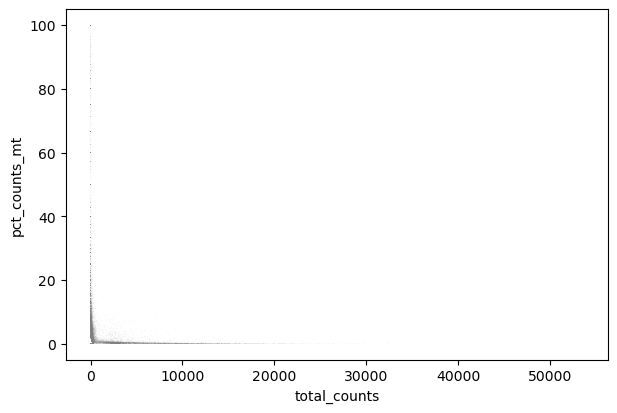

In [13]:
sc.pl.scatter(adata1, x='total_counts', y='pct_counts_mt')

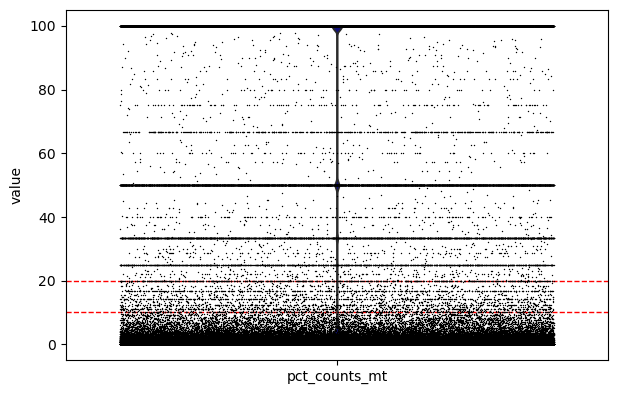

In [14]:
# Plot the violin plot
ax = sc.pl.violin(adata1, "pct_counts_mt", jitter=0.4, log=False, color='darkblue', show=False)

# Add horizontal lines for thresholds
thresholds = [10, 20]  # Replace with your desired percentages
for threshold in thresholds:
    plt.axhline(y=threshold, color='red', linestyle='--', linewidth=1)

# Show the plot
plt.show()

Most cells have mitochondrial percentages below the 20% threshold, indicating that a significant portion of the dataset represents viable and healthy cells.
A noticeable number of cells exceed the 20% threshold, which suggests these cells might be stressed, damaged, or dying. These should likely be filtered out to avoid introducing bias in downstream analyses.

In [36]:
print(adata1.shape)

(8043, 36601)


In [37]:
adata1 = adata1[adata1.obs['pct_counts_mt'] < 20, :]


(8024, 36601)


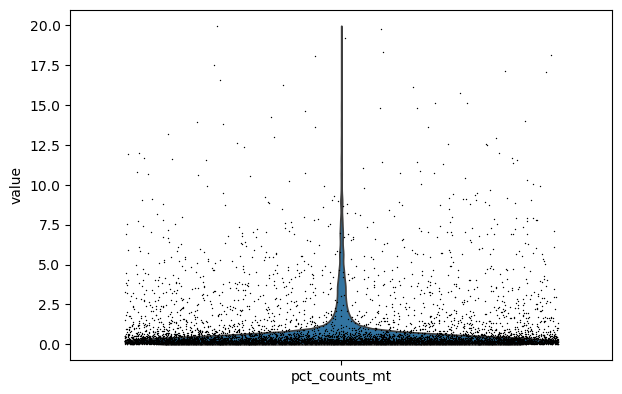

In [38]:
print(adata1.shape)  # Check the number of cells and genes
sc.pl.violin(adata1, ['pct_counts_mt'], jitter=0.4, log=False)


### Filter Cells Based on Total Genes

In [20]:
adata1.obs['n_genes_by_counts'].describe()


count    1.127217e+06
mean     2.558806e+01
std      2.153789e+02
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      8.624000e+03
Name: n_genes_by_counts, dtype: float64

The 25% and 50% (median) values are 0 and 1, respectively. This indicates that at least 50% of the cells have extremely low gene counts (either 0 or 1)

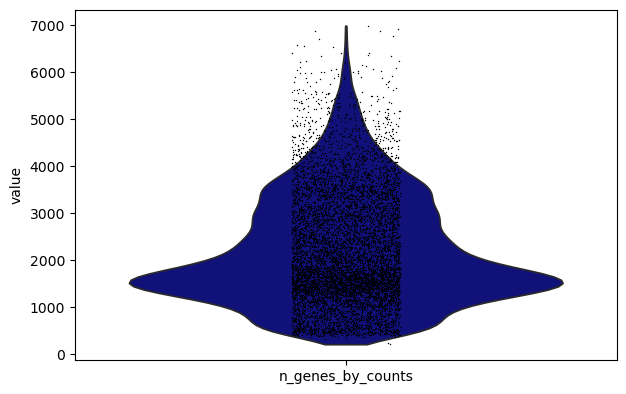

In [40]:
sc.pl.violin(adata1, 'n_genes_by_counts', color='darkblue')

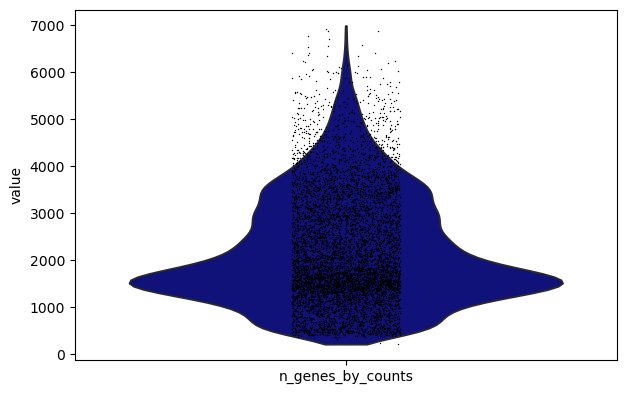

In [42]:
sc.pp.filter_cells(adata1, min_genes=200)
sc.pl.violin(adata1, 'n_genes_by_counts', color='darkblue')

The updated violin plot after applying the lower bound of 200 for n_genes_by_counts looks better since the extreme low-quality cells (those with fewer than 200 detected genes) have been removed. This filtering step effectively eliminates potentially empty droplets or damaged cells.

However, there is still a tail extending to very high n_genes_by_counts values (>6,000–8,000). To remove potential doublets or aggregated cells with abnormally high gene counts, we apply an upper limit of 8000.

In [43]:
#upper bound
adata1 = adata1[adata1.obs['n_genes_by_counts'] < 8000, :]

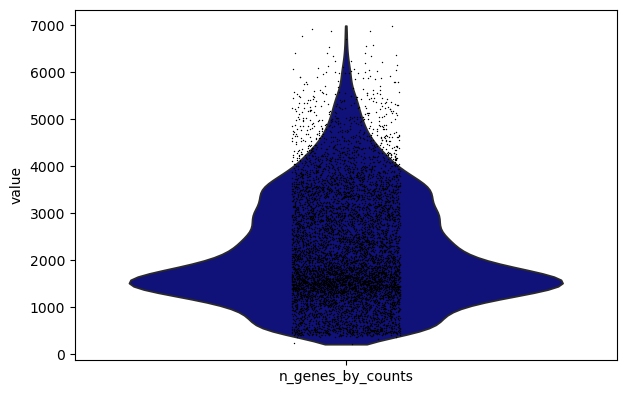

In [44]:
sc.pl.violin(adata1, 'n_genes_by_counts', color='darkblue')

### Filter Cells Based on Total Count

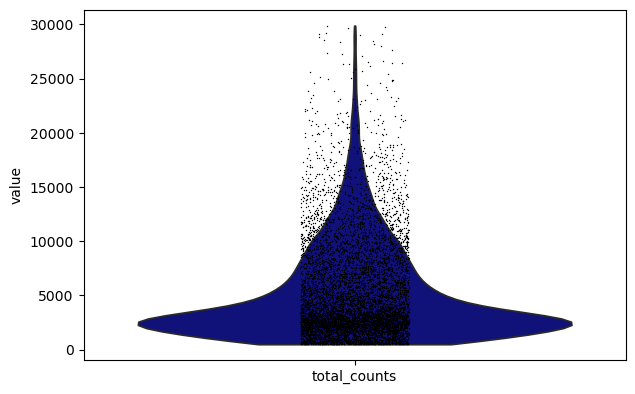

In [45]:
sc.pl.violin(adata1, "total_counts", color='darkblue')

Some cells have extremely low total counts, likely corresponding to damaged cells, empty droplets, or technical noise. We start by setting the lower bound to 500.

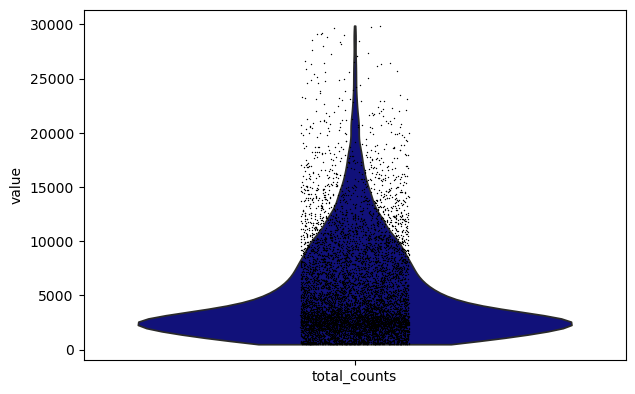

In [46]:
adata1 = adata1[adata1.obs['total_counts'] > 500, :]
sc.pl.violin(adata1, "total_counts", color='darkblue')

Cells with extremely high total counts are often doublets or aggregates and should be filtered out.
Based on the plot, an upper bound around 20,000–30,000 total counts seems reasonable.

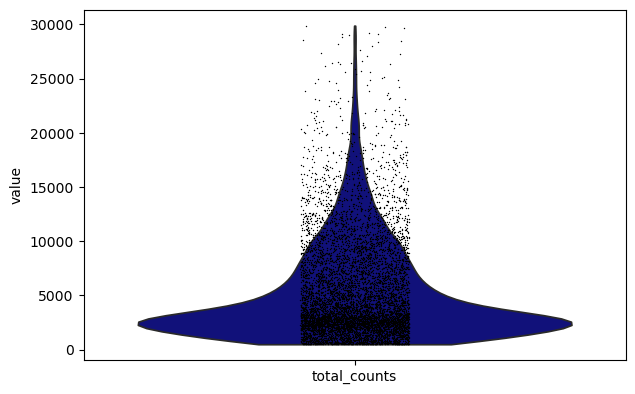

In [47]:
adata1 = adata1[adata1.obs['total_counts'] < 30000, :]
sc.pl.violin(adata1, "total_counts", color='darkblue')

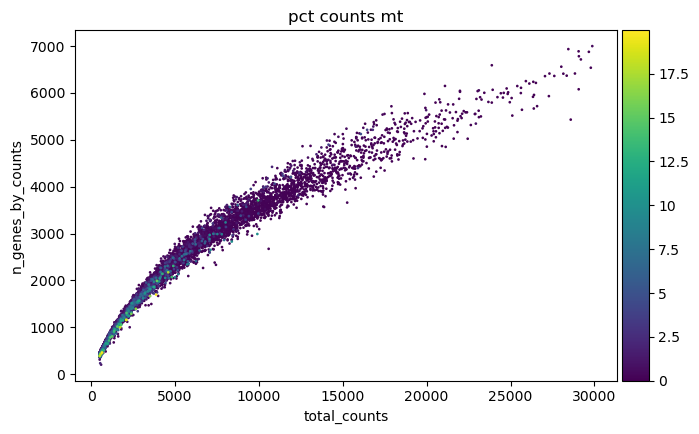

In [39]:
sc.pl.scatter(adata1, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

## Filtering the outliers in a data-driven way

Define a function to find outliers in a data-driven way:

In [48]:
def is_outlier(adata, metric: str, nmads: int):
    M = adata.obs[metric]
    outlier = (M < np.median(M) - nmads * median_abs_deviation(M)) | (
        np.median(M) + nmads * median_abs_deviation(M) < M
    )
    return outlier

In [49]:
adata1.obs["outlier"] = (
    is_outlier(adata1, "log1p_total_counts", 6)
    | is_outlier(adata1, "log1p_n_genes_by_counts", 6)
    | is_outlier(adata1, "pct_counts_in_top_20_genes", 6)
)
adata1.obs.outlier.value_counts()

C:\Users\gajaj\AppData\Local\Temp\ipykernel_8336\3198897286.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata1.obs["outlier"] = (


outlier
False    7984
True       40
Name: count, dtype: int64

In [50]:
adata1.obs["mt_outlier"] = is_outlier(adata1, "pct_counts_mt", 3) | (
    adata1.obs["pct_counts_mt"] > 8
)
adata1.obs.mt_outlier.value_counts()

mt_outlier
False    6491
True     1533
Name: count, dtype: int64

In [29]:
adata1.obs["mt_outlier"]

AAACCCAAGACCAGAC-1    False
AAACCCAAGACCTTTG-1    False
AAACCCAAGACTTCCA-1    False
AAACCCAAGAGCCATG-1    False
AAACCCAAGCATCCTA-1    False
                      ...  
TTTGTTGTCCGACAGC-1    False
TTTGTTGTCGTAGCCG-1    False
TTTGTTGTCTCATGCC-1    False
TTTGTTGTCTCGTCGT-1    False
TTTGTTGTCTGCGAGC-1    False
Name: mt_outlier, Length: 72855, dtype: bool

### Normalization

In [30]:
# Saving count data
adata1.layers["counts"] = adata1.X.copy()

In [31]:
# Normalizing to median total counts
sc.pp.normalize_total(adata1)
# Logarithmize the data
sc.pp.log1p(adata1)

### Feature selection

In [32]:
sc.pp.highly_variable_genes(adata1, n_top_genes=2000)

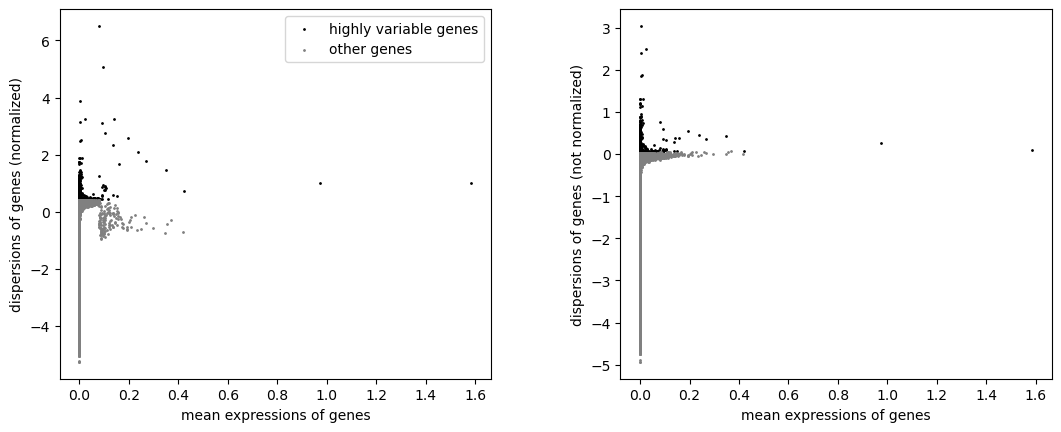

In [33]:
sc.pl.highly_variable_genes(adata1)

In [34]:
adata1 = adata1[:, adata1.var.highly_variable]
adata1

View of AnnData object with n_obs × n_vars = 72855 × 2000
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'outlier', 'mt_outlier'
    var: 'gene_ids', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    layers: 'counts'

### Dimensionality reduction

In [35]:
sc.tl.pca(adata1)

c:\Users\gajaj\anaconda3\envs\preprocessing\lib\site-packages\scanpy\preprocessing\_pca.py:317: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca


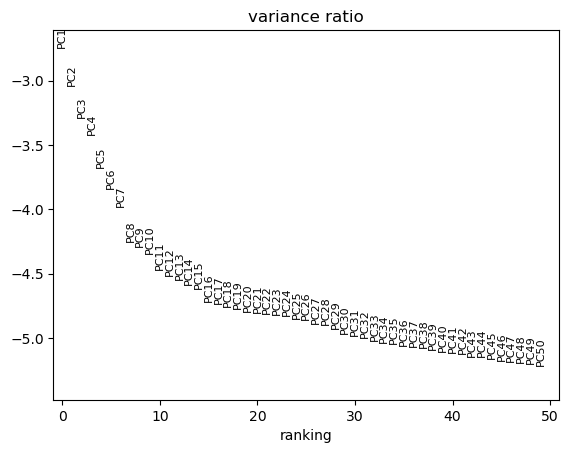

In [36]:
sc.pl.pca_variance_ratio(adata1, n_pcs=50, log=True)

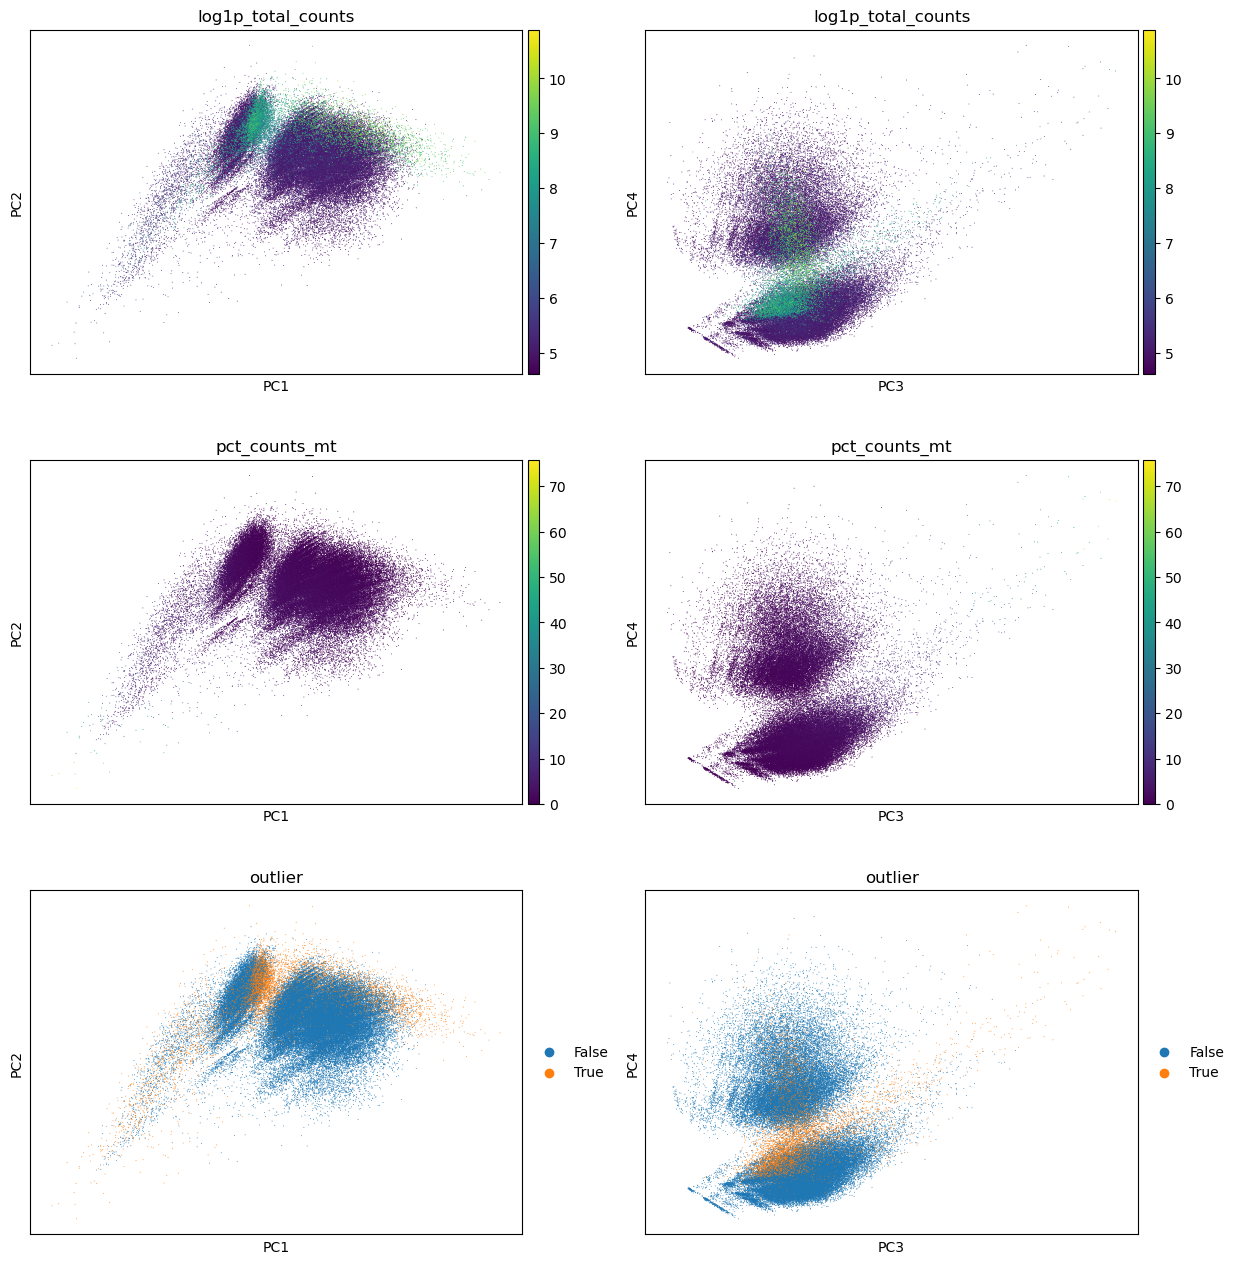

In [37]:
sc.pl.pca(
    adata1,
    color=["log1p_total_counts"] * 2 + ["pct_counts_mt"] * 2 + ["outlier"] * 2,
    dimensions=[(0, 1), (2, 3)] * 3,
    ncols=2,
    # size=2,
)

### Nearest neighbor graph constuction and visualization

In [38]:
sc.pp.neighbors(adata1)

c:\Users\gajaj\anaconda3\envs\preprocessing\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [39]:
sc.tl.umap(adata1)

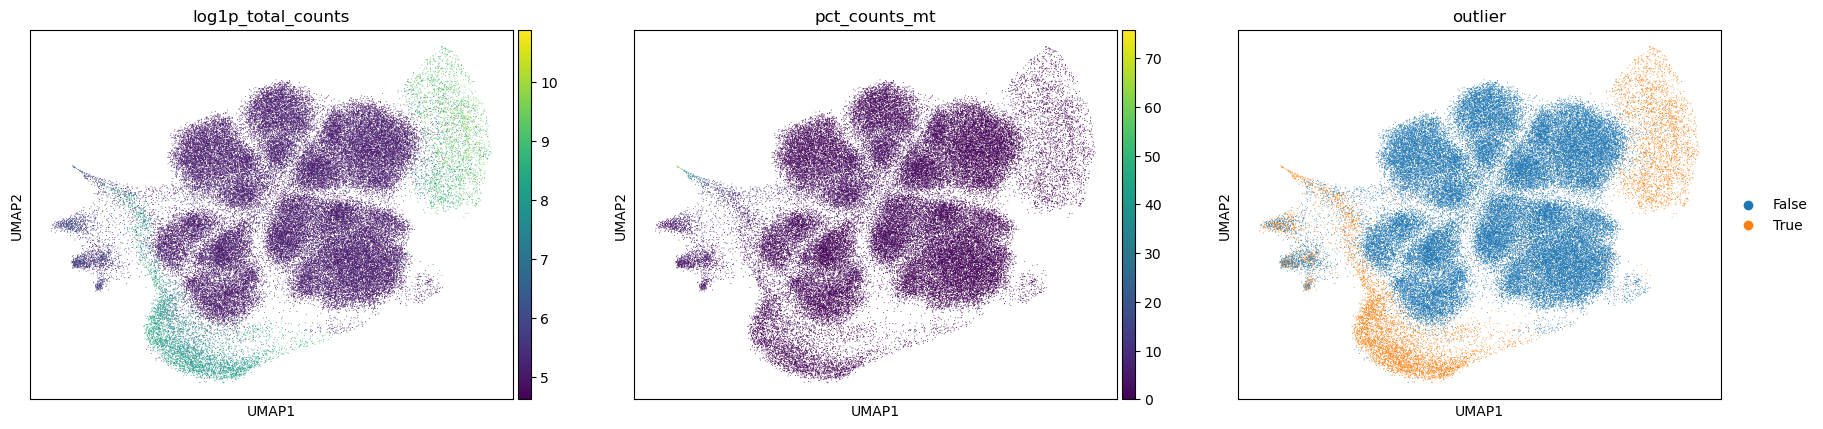

In [40]:
sc.pl.umap(
    adata1,
    color=["log1p_total_counts", "pct_counts_mt", "outlier"]
)

### Clustering

In [41]:
# Using the igraph implementation and a fixed number of iterations can be significantly faster, especially for larger datasets
sc.tl.leiden(adata1, n_iterations=2)

C:\Users\gajaj\AppData\Local\Temp\ipykernel_3208\2380624730.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata1, n_iterations=2)


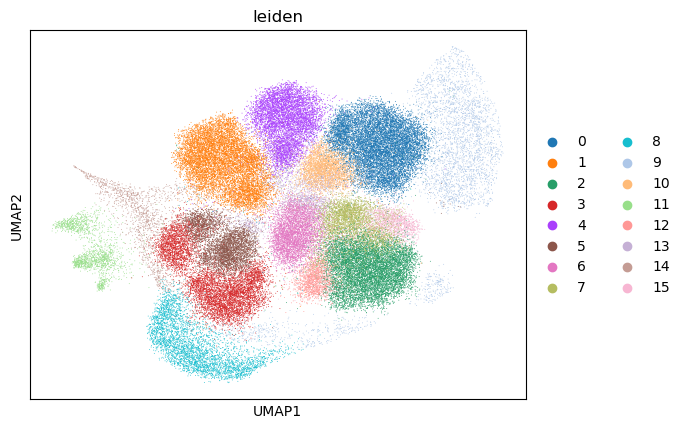

In [42]:
sc.pl.umap(adata1, color=["leiden"])

## Preprocessing sample 2

In [75]:
adata2.var_names_make_unique()

In [76]:
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
adata2.var["mt"] = adata2.var_names.str.startswith("MT-")
# ribosomal genes
adata2.var["ribo"] = adata2.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes
adata2.var["hb"] = adata2.var_names.str.contains("^HB[^(P)]")

adata2.var

,gene_ids,mt,ribo,hb
MIR1302-2HG,ENSG00000243485,False,False,False
FAM138A,ENSG00000237613,False,False,False
OR4F5,ENSG00000186092,False,False,False
AL627309.1,ENSG00000238009,False,False,False
AL627309.3,ENSG00000239945,False,False,False
...,...,...,...,...
AC141272.1,ENSG00000277836,False,False,False
AC023491.2,ENSG00000278633,False,False,False
AC007325.1,ENSG00000276017,False,False,False
AC007325.4,ENSG00000278817,False,False,False


In [77]:
sc.pp.calculate_qc_metrics(
    adata2, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True
)

In [78]:
adata2.obs

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo,total_counts_hb,log1p_total_counts_hb,pct_counts_hb
AAACCCAAGAAACACT-1,0,0.000000,0,0.000000,NaN,NaN,NaN,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN
AAACCCAAGAAACTAC-1,0,0.000000,0,0.000000,NaN,NaN,NaN,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN
AAACCCAAGAAAGACA-1,0,0.000000,0,0.000000,NaN,NaN,NaN,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN
AAACCCAAGAAATGGG-1,2,1.098612,2,1.098612,100.000000,100.000000,100.0,100.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
AAACCCAAGAAATTGC-1,187,5.236442,196,5.283204,30.102041,55.612245,100.0,100.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGTCTTGGCTC-1,1,0.693147,1,0.693147,100.000000,100.000000,100.0,100.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
TTTGTTGTCTTGTTAC-1,1,0.693147,1,0.693147,100.000000,100.000000,100.0,100.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
TTTGTTGTCTTTACAC-1,0,0.000000,0,0.000000,NaN,NaN,NaN,NaN,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN
TTTGTTGTCTTTGCGC-1,1,0.693147,1,0.693147,100.000000,100.000000,100.0,100.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
